In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(224,224,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(2, activation="softmax") 
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


train_gen = ImageDataGenerator(rescale=1./255)
val_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    r"C:\Users\ADMIN\Music\chest_xray\chest_xray_project_clean\train",
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical"
)

val_data = val_gen.flow_from_directory(
    r"C:\Users\ADMIN\Music\chest_xray\chest_xray_project_clean\val",
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical"
)


history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=1
)

model.save("model.h5")

print("🎉 model.h5 file created successfully!")

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
163/163 ━━━━━━━━━━━━━━━━━━━━ 1573s 10s/step - accuracy: 0.8978 - loss: 0.2644 - val_accuracy: 0.6875 - val_loss: 0.4768


🎉 model.h5 file created successfully!


Found 624 images belonging to 2 classes.
20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.7965 - loss: 0.5798
Test Loss: 0.5798335671424866
Test Accuracy: 0.7964743375778198
20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step
Confusion Matrix:
 [[123 111]
 [ 16 374]]
              precision    recall  f1-score   support

      NORMAL       0.88      0.53      0.66       234
   PNEUMONIA       0.77      0.96      0.85       390

    accuracy                           0.80       624
   macro avg       0.83      0.74      0.76       624
weighted avg       0.81      0.80      0.78       624



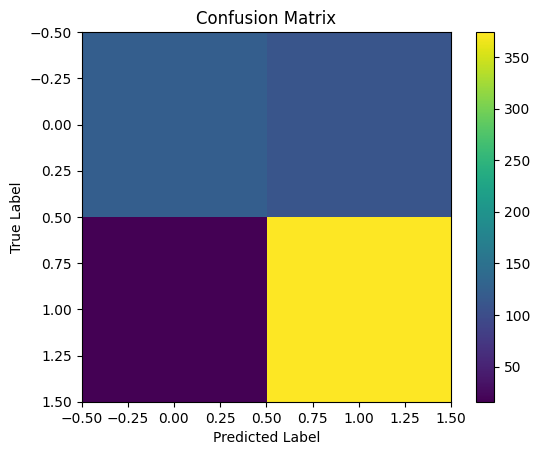

In [6]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

model = load_model("model.h5")


test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(
    r"C:\Users\ADMIN\Music\chest_xray\chest_xray_project_clean\test",
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)


test_loss, test_acc = model.evaluate(test_data)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)


y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = test_data.classes

cm = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", cm)


target_labels = list(test_data.class_indices.keys())
print(classification_report(y_true, y_pred_classes, target_names=target_labels))


plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()